In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
df = pd.read_csv('50_Startups.csv')

In [20]:
df = pd.get_dummies(df, columns=["State"], drop_first=True)


In [21]:
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


In [22]:
df = df.astype(float)

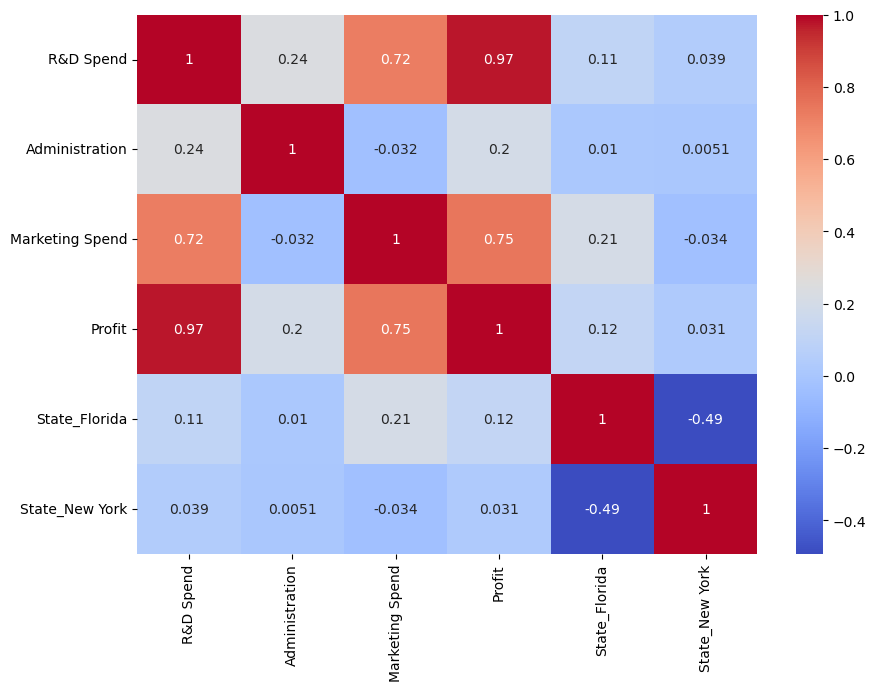

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [24]:
X = df.drop("Profit", axis=1)
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]
print(vif)

           Feature        VIF
0            const  26.600153
1        R&D Spend   2.495511
2   Administration   1.177766
3  Marketing Spend   2.416797
4    State_Florida   1.387641
5   State_New York   1.335061


In [27]:
X = df.drop("Profit", axis=1)
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns

vif["VIF"] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]

print(vif)


           Feature        VIF
0            const  26.600153
1        R&D Spend   2.495511
2   Administration   1.177766
3  Marketing Spend   2.416797
4    State_Florida   1.387641
5   State_New York   1.335061


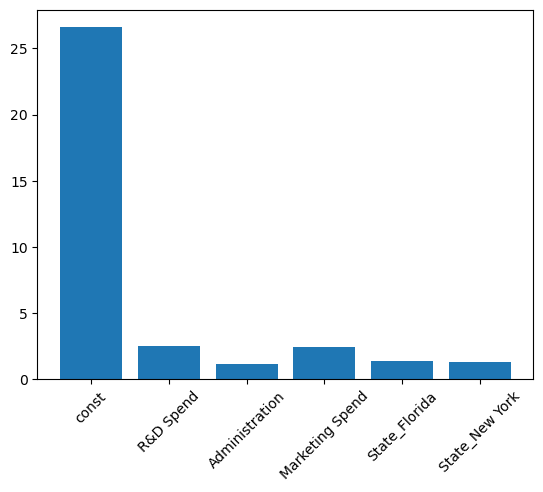

In [25]:
plt.bar(vif["Feature"], vif["VIF"])
plt.xticks(rotation=45)
plt.show()